# Лабораторная работа 2

## Линейная регрессия

## Часть 1: Приближаем функции


### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна;
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Теперь мы хотим построить **модель**, т.е. определить алгоритм, который будет принимать на вход некоторый набор параметров (в данном случае это измеренные нами $H, W, L$ и $N$), и выдавать значение некоторой **целевой переменной** (в данном примере это $S$). Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:

$$S = a_0 + a_1H + a_2W + a_3L + a_4N.$$

Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_0, a_1, a_2, a_3, a_4$, удовлетворяющие вот такому требованию:
$$\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 \longrightarrow \min$$
Т.е. мы хотим, чтобы квадрат отклонения правой части от левой был поменьше для всех $n$ студентов. Введём несколько обозначений:
$$X =
\begin{pmatrix}
1 & H_1 & W_1 & L_1 & N_1\\
1 & H_2 & W_2 & L_2 & N_2\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & H_n & W_n & L_n & N_n
\end{pmatrix}, \qquad a=
\begin{pmatrix}
a_0\\ a_1\\ \vdots\\ a_4
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}.$$

Теперь наше требование выше можно переписать в таком виде:
$$
\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 = |y - Xa|^2 \longrightarrow \min
$$

И теперь видно, что мы получили задачу на метод наименьших квадратов!
Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём Вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (3.1 баллов)

**ВАЖНО! В этом задании вам нельзя использовать циклы (в том числе рекурсии, генераторы и конструкции вида map/reduce), кроме цикла в задании 1.5, который мы вам оставили. За наличие цикла в вашем коде мы поставим вам не более половины от стоимости задания.**

Скачайте файлы ``train.txt`` и ``test.txt``. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — некоторое число точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Функцию $f$ мы вам не скажем. Ваша задача — по данным из файла ``train.txt`` (будем называть их обучающей выборкой) подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (из файла ``test.txt``).

In [ ]:
import numpy as np
from os.path import join

PATH = "C:\\Users\\marya\\Downloads\\"

data_train = np.loadtxt(join(PATH, "train.txt"), delimiter=',')
data_test = np.loadtxt(join(PATH, "test.txt"), delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$

In [ ]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]
X_train

array([ 0.5879397 ,  0.31658291,  0.24623116, -0.67839196, -0.04522613,
        0.89949749,  0.63819095, -0.31658291,  0.2160804 ,  0.20603015,
       -0.84924623, -0.34673367,  0.42713568, -0.46733668, -0.42713568,
        0.18592965, -0.53768844, -0.91959799,  0.81909548,  0.40703518,
        0.6281407 , -0.75879397, -0.87939698])

**1. [0,15 балла]** Найдите с помощью метода наименьших квадратов линейную функцию $y = kx + b$, наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
n = len(X_train)
A = np.ones((n, 1))
B = np.array([X_train]).transpose()

X = np.concatenate((A, B), axis=1)
Y = np.array([y_train]).T

a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print('y = ', a[1, 0], ' x + ', a[0, 0], sep='')

y = 4.0483560781067425 x + 2.4539322330626554


**2. [0,15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

In [ ]:
def f(x):
    return a[1, 0] * x + a[0, 0]

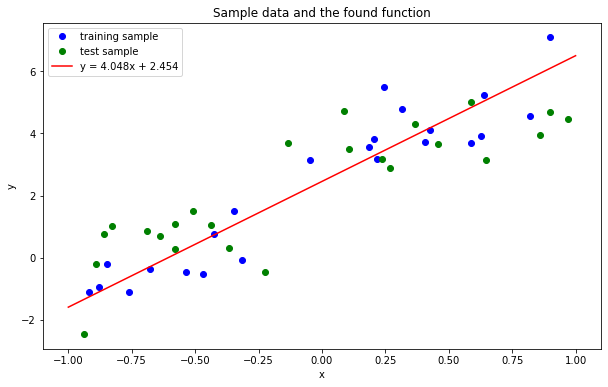

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'bo', label='training sample')
plt.plot(X_test, y_test, 'go', label='test sample')
plt.plot([-1, 1], [f(-1), f(1)], color='red', label='y = 4.048x + 2.454')
plt.title('Sample data and the found function')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

**3. [0,4 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и сохраните его коэффициенты в массив `poly_coef` (от младшего члена к старшему). Обязательно обоснуйте выбор степени многочлена.

**Ответ:** Чтобы добиться минимальной среднеквадратичной ошибки на обучающей выборке, можно найти функцию, проходящую через каждую точку.
Тогда ошибка будет равна 0. Степень такого многочлена равна 22, так как размер выборки 23.

In [ ]:
poly_coef = np.polyfit(X_train, y_train, 22)[::-1]
poly_coef

array([-5.48928132e+02, -6.14631857e+03,  1.39862743e+05, -1.18645296e+05,
       -5.21075123e+06,  1.05245474e+07,  8.93729664e+07, -2.08485267e+08,
       -8.92063425e+08,  2.06325320e+09,  5.70523486e+09, -1.19453979e+10,
       -2.43892430e+10,  4.27059185e+10,  7.04033792e+10, -9.50457222e+10,
       -1.35000865e+11,  1.27622533e+11,  1.63800820e+11, -9.41578641e+10,
       -1.12999158e+11,  2.91738641e+10,  3.35217818e+10])

**4. [0,15 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок. Удалось ли графику пройти через все точки из выборки? Попробуйте объяснить, почему?

(-1.0, 1.0)

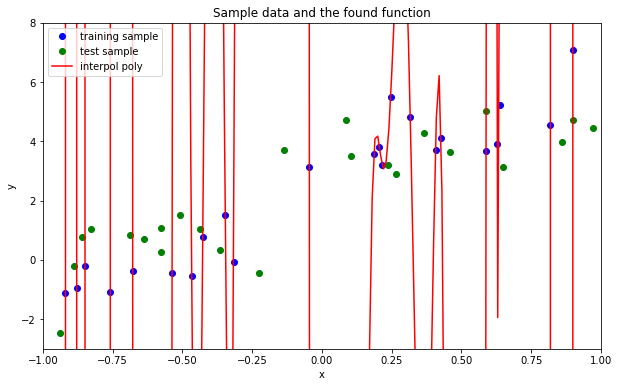

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'bo', label='training sample')
plt.plot(X_test, y_test, 'go', label='test sample')

x = np.arange(-1, 1, 0.01)
plt.plot(x, np.polyval(poly_coef[::-1], x), color='red', label='interpol poly')

plt.title('Sample data and the found function')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.ylim(-3, 8)
plt.xlim(-1, 1)

**Объяснение:** Через все точки выборки график не прошел, так как найденная функция не учитывает тот факт, что все значения даны с некоторой
ошибкой. Поэтому найденная функция плохо подходит под точки из тестовой выборки.

**5. [0,5 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Сохраните найденные коэффициенты многочленов в матрицу `poly_coefs` (коэффициенты многочлена степени $j$ должны быть сохранены в $j$-й строке матрицы от младшего члена к старшему).

In [ ]:
n = len(X_train)
poly_coefs = np.zeros((10, 11))

X = np.vander(X_train, 11, increasing=True)
Y = np.array([y_train]).T

for k in range(10):
    cur_coef = np.linalg.inv(X[:, :k+2].T.dot(X[:, :k+2])).dot(X[:, :k+2].T).dot(Y).T[0]
    poly_coefs[k] = np.pad(cur_coef, (0, 9 - k))

# Простая проверка, что матрица poly_coefs имеет столько строк, сколько нужно
assert poly_coefs.shape[0] == 10
poly_coefs

array([[   2.45393223,    4.04835608,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   2.5694219 ,    4.01015943,   -0.3551553 ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   2.54688319,    4.7869345 ,   -0.41165762,   -1.41634742,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   3.25302411,    4.49788737,   -6.92753076,   -0.76232916,
           7.97572932,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   3.11521784,    6.42425264,   -6.36050064,  -11.18097856,
           7.592385  ,   10.50504691,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   3.07558089,    6.47067818,   -5.7037944

**6. [0,6 балл]** Для каждого из многочленов из задания 1.5, а также для многочлена из задания 1.4 найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$. Полученные значения ошибок сохраните в матрицу `errors` высоты 11 и ширины 2. В первом столбце матрицы должны стоять значения ошибок на тренировочных данных, во втором --- на тестовых. В первых 10 строках матрицы должны стоять значения ошибок для многочленов соответствующих степений из задания 1.5, в 11-й строке --- значение ошибки для многочлена из задания 1.4.

In [ ]:
values_train = np.apply_along_axis(lambda coefs: np.polyval(coefs[::-1], X_train), 1, poly_coefs)
values_train = np.append(values_train, np.array([np.polyval(poly_coef[::-1], X_train)]), axis=0)
err_train = np.sum((values_train - y_train) ** 2, axis=1) / n

values_test = np.apply_along_axis(lambda coefs: np.polyval(coefs[::-1], X_test), 1, poly_coefs)
values_test = np.append(values_test, np.array([np.polyval(poly_coef[::-1], X_test)]), axis=0)
err_test = np.sum((values_test - y_test) ** 2, axis=1) / n

errors = np.concatenate((np.array([err_train]).T, np.array([err_test]).T), axis=1)
errors 

array([[7.00912588e-01, 1.72101046e+00],
       [6.91992919e-01, 1.63679699e+00],
       [6.53662070e-01, 1.54639482e+00],
       [4.52989800e-01, 2.35060578e+00],
       [3.69973832e-01, 2.52105175e+00],
       [3.69614394e-01, 2.60029867e+00],
       [3.54844465e-01, 3.32411131e+00],
       [3.52453365e-01, 3.74917719e+00],
       [3.38277875e-01, 5.49063984e+00],
       [3.32784411e-01, 8.34036360e+00],
       [1.44165457e-11, 6.94713122e+14]])

**7. [0,5 балла]** Для $k = 1,2,3,4,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

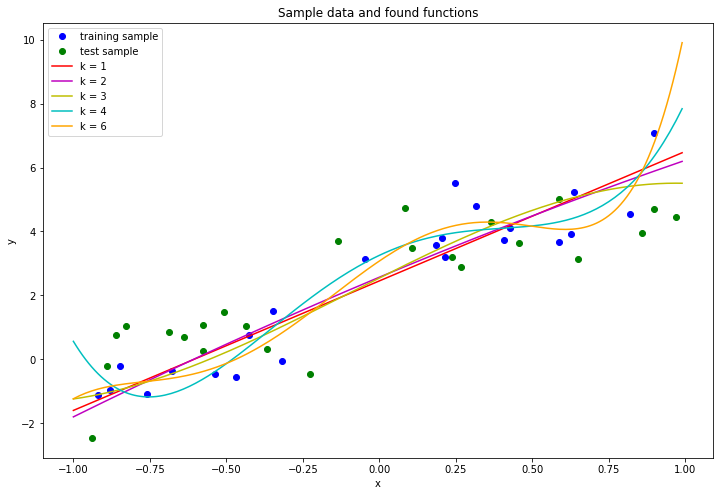

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(X_train, y_train, 'bo', label='training sample')
plt.plot(X_test, y_test, 'go', label='test sample')

x = np.arange(-1, 1, 0.01)
plt.plot(x, np.polyval(poly_coefs[0][::-1], x), color='r', label='k = 1')
plt.plot(x, np.polyval(poly_coefs[1][::-1], x), color='m', label='k = 2')
plt.plot(x, np.polyval(poly_coefs[2][::-1], x), color='y', label='k = 3')
plt.plot(x, np.polyval(poly_coefs[3][::-1], x), color='c', label='k = 4')
plt.plot(x, np.polyval(poly_coefs[5][::-1], x), color='orange', label='k = 6')

plt.title('Sample data and found functions')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

**8. [0,65 балла]** Что происходит с ошибкой на тестовых данных при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как называется наблюдаемый вами эффект?

**Ответ:** До какого-то момента рост рост степени многочлена ведет к уменьшению ошибки на тестовых данных, но потом ошибка начинает увеличиваться. Это объясняется тем, что функция сильно подстраивается под тренировочные данные и перестает улавливать общие закономерности. Данный эффект называется переобучением.

## Часть 2: Обучаем машины

### Задание 2. Линейная регрессия (3 балла)

В этом задании вам предстоит заняться предсказанием цен на алмазы. Скачайте файл `diamonds_features.csv`, содержащий данные, с которыми вам предстоит работать. Запустите следующую ячейку:

In [ ]:
data = np.loadtxt("diamonds_features.csv", delimiter=",", dtype="str")[1:, :]
print(data[:5, :])

[['0.8' 'Ideal' 'F' 'VS1' '62.4' '55.0' '5.92' '5.88' '3.68' '3884']
 ['0.91' 'Premium' 'F' 'SI2' '61.4' '60.0' '6.23' '6.21' '3.82' '3618']
 ['1.28' 'Premium' 'I' 'VS2' '61.7' '60.0' '7.05' '6.95' '4.32' '6762']
 ['0.41' 'Very Good' 'F' 'SI1' '61.9' '55.0' '4.78' '4.81' '2.97' '769']
 ['1.07' 'Premium' 'F' 'SI2' '61.8' '59.0' '6.53' '6.57' '4.05' '4560']]


Мы вывели для вас первые 5 строчек данных. Описания значений в колонках вы можете найти в файле `diamonds_descriptions.txt`.

Глобально в этом задании вам предстоит научиться строить модель линейной регрессии для предсказания цены алмаза по его признакам. Данные устроены таким образом, что в каждой строчке располагаются признаки, описывающие объект (алмаз), а в каждой фиксированной колонке --- всевозможные значения конкретного признака для всех объектов в данных.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) с параметром `test_size=0.3`. Обязательно зафиксируйте параметр `random_state`.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.3, random_state=42)

Теперь у вас есть две выборки, каждая из которых содержит случайное подмножество наших данных. Обучающую выборку мы в дальнейшем будем использовать для обучения модели линейной регрессии, а тестовую, соответственно, для теста.

**ВАЖНО: за обучение модели на тестовой выборке будем ставить 0 за весь пункт!**

### Работаем с числовыми данными

Сейчас ваши данные содержат как привычные вам числовые признаки, описывающие объект, так и категориальные признаки, которые описывают принадлежность объекта к той или иной категории, и в данных представляются строками. Что делать с данными, которые представлены строками --- мы разберёмся чуть позже, а пока давайте забудем, что они у нас есть, и будем работать только с числовыми.

**0,5. [0 баллов]** Заполните переменные `numeric_features` и `categorical_features` индексами столбцов в данных, содержащих числовые и категориальные признаки соответственно. После этого можно проверить, что массив `data[:, numeric_features]` содержит только числовые данные.

In [ ]:
numeric_features = [0, 4, 5, 6, 7, 8]
categorical_features = [1, 2, 3]
print(data[:, numeric_features])

[['0.8' '62.4' '55.0' '5.92' '5.88' '3.68']
 ['0.91' '61.4' '60.0' '6.23' '6.21' '3.82']
 ['1.28' '61.7' '60.0' '7.05' '6.95' '4.32']
 ...
 ['0.31' '61.4' '56.0' '4.38' '4.41' '2.7']
 ['0.36' '62.0' '59.0' '4.56' '4.51' '2.81']
 ['0.31' '59.0' '62.0' '4.41' '4.43' '2.61']]


**1. [0,3 баллов]** Решите задачу линейной регрессии для предсказания цены алмаза по его числовым признакам (не забудьте, что линейная модель должна также содержать свободный от признаков член) и протестируйте ваше решение на тестовых данных. Выведите полученные регрессионные коэффициенты для каждого признака. Попробуйте проинтерпретировать полученные коэффициенты: сравните их друг с другом, посмотрите на их знаки и на абсолютную величину и попробуйте на основе этого придать им житейский смысл. Согласуется ли построенная интерпретация модели с вашими представлениями о жизни? 

*Примечание: обратите внимание, сейчас все данные у вас хранятся в строковом виде. Чтобы работать с ними как с числами, необходимо явно привести их к типу float. В NumPy для этого есть специальная удобная команда astype.*

In [ ]:
# Нахождение коэффициентов

X = np.concatenate((np.ones((X_train.shape[0], 1)), 
                    X_train[:, numeric_features].astype(float)), axis=1)
Y = np.array([y_train.astype(float)]).T
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y).T[0]

features_name = ['free member', 'carat', 'depth', 'table', 'x', 'y', 'z']
for i in range(7):
    print(features_name[i], ': ', a[i], sep='')

free member: 20320.693832829646
carat: 10786.237940072826
depth: -199.2786751103601
table: -95.04055850892676
x: -1308.08011016735
y: 24.327258329167606
z: 37.04825215381961


In [ ]:
# Тестирование

def price(x):
    return np.sum(a * x)

X_test_ = np.concatenate((np.ones((X_test.shape[0], 1)), X_test[:, numeric_features].astype(float)), axis=1)
values_test = np.apply_along_axis(price, 1, X_test_)
err_test = sum((values_test - y_test.astype(float)) ** 2) / len(y_test)

print(err_test)

2113575.9171204935


**Интерпретация модели:** вне зависимости от свойств алмаза он имеет большую цену (свободный член). Сильнее всего на цену влияет количество карат (чем больше карат, тем дороже) и длина алмаза (чем меньше длина, тем дороже), остальные характеристики не значительны. Важность количества карат согласуется с моими представлениями о жизни. 

Если вы всё сделали правильно, у вас должны были получиться довольно большие по абсолютной величине коэффициенты.

**2. [0,15 баллов]** Попробуйте объяснить, почему ситуация, когда модель имеет большие по модулю коэффиценты, нежелательна?

Подсказка: Вы можете попытаться проиллюстрировать свои рассуждения, искусственно описав с помощью исследуемых признаков два алмаза, которые по вашему мнению должны иметь одинаковую цену, и проверить, выдаст ли построенная модель близкие предсказания на этих объектах.

**Обоснование:** Когда модель имеет большие по модулю коэффициенты, это приводит к зависимости целевой переменной от какого-то признака. И тогда малые изменения этого параметра будут приводить к сильным изменениям значения целевой переменной.

**Пример:** Второй алмаз в разы больше первого, но немного меньше карат. Их цены должны быть приблизительно равны, однако в полученной модели сильно различаются.

In [ ]:
diamond_1 = [1, 1.6, 65.4, 55, 5, 6, 3.6] # 1.6 карат, x = 5, y = 6, z = 3.6
diamond_2 = [1, 1.5, 45, 55, 10, 12, 5] # 1.5 карат, x = 10, y = 12, z = 5
print(price(diamond_1), price(diamond_2))

13057.555173629653 9701.646904027317


**3. [0.2 баллов]** Нарисуйте гистограмму, характеризующую распределение объясняемой переменной в обучающей выборке. На такой диаграмме по оси `x` должны быть сгруппированные значения объясняемой переменной, а по оси `y` --- количество объектов выборки с таким значением. Столбцов на вашем графике должно быть не менее 50.

Text(0, 0.5, 'number of diamonds')

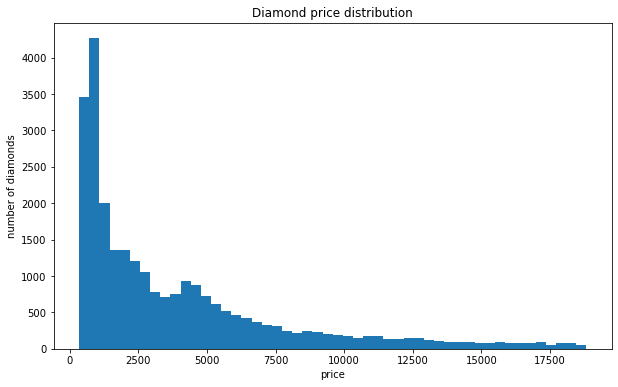

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_train.astype(float), 50)
plt.title('Diamond price distribution')
plt.xlabel('price')
plt.ylabel('number of diamonds')

В левой части гистограммы располагаются небольшие значения целевой переменной, и объектов с таким значением в выборке довольно много (не забываем, что у нас тут не абстрактная математика в вакууме, мы тут цену алмазов предсказываем!); с увеличением значения таргета (целевой переменной) количество соответствующих объектов в выборке убывает. Сначала число объектов убывает довольно стремительно, но с некоторого момента разница в высоте между соседними столбцами уже почти незаметна. Такое явление называется "распределение с тяжёлым хвостом", и оно не очень желательно при построении модели.

Попробуем избавиться от тяжёлого хвоста. Для этого нужно применить к таргету какую-нибудь медленнорастущую биективную функцию, например логарифм. 

<!-- Однако вспомним, что мы намеренно отмасштабировали таргет таким образом, чтобы среди его значений был 0, поэтому нужно придумать ещё какое-то преобразование, чтобы все значения целевой переменной попали в область определения логарифма. -->

**4. [0,25 баллов]** Прологарифмируйте целевую переменную и нарисуйте график распределения логарифмированного таргета. Сильно ли он отличается от предыдущего графика? Попробуйте объяснить, почему явление "распределения с тяжёлым хвостом" нежелательно при построении модели.

Text(0, 0.5, 'number of diamonds')

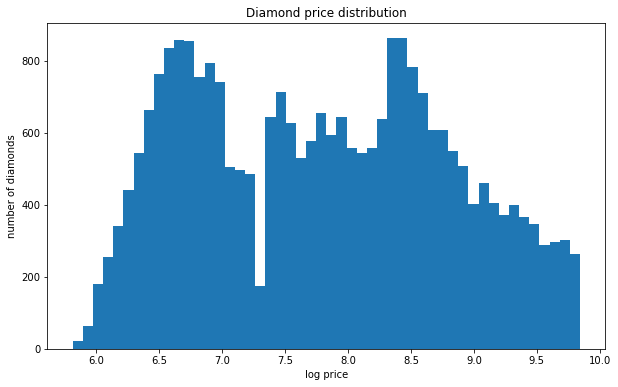

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(y_train.astype(float)), 50)
plt.title('Diamond price distribution')
plt.xlabel('log price')
plt.ylabel('number of diamonds')

**Обоснование:** При распределении с тяжёлым хвостом больших значений очень мало, поэтому они плохо учитываются при построении модели. Также столбцы, соответствующие большим значениям становятся практически одинаковыми, из-за чего модель может плохо учитывать различия между большими значениями.

Снова обучите линейную модель, считая целевой переменной логарифмированный таргет. Помните, что чтобы протестировать полученную линейную модель, важно взять экспоненту от полученных предсказаний.

In [ ]:
# Нахождение коэффициентов

X = np.concatenate((np.ones((X_train.shape[0], 1)), 
                    X_train[:, numeric_features].astype(float)), axis=1)
Y = np.array([np.log(y_train.astype(float))]).T
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y).T[0]

In [ ]:
# Тестирование

def price(x):
    return np.exp(np.sum(a * x))

X_test_ = np.concatenate((np.ones((X_test.shape[0], 1)), 
                          X_test[:, numeric_features].astype(float)), axis=1)
values_test = np.apply_along_axis(price, 1, X_test_)
err_test = sum((values_test - y_test.astype(float)) ** 2) / len(y_test)

print(err_test)

2514576.890200259


Удалось ли добиться лучшего качества?

**Ответ:** Нет, не удалось

### Работаем с категориальными признаками

До сих пор мы работали с данными, которые представляются числами. Однако часто в датасетах объекты описываются не только признаками, содержащими числа, но и строковыми признаками, определяющими принадлежность объекта к некоторой категории. Такие признаки называются категориальными. Важно не выкидывать их из модели, потому что часто они содержат довольно полезную информацию об объекте, которую хорошая модель должна обязательно учитывать.

В этом разделе мы будем рассматривать только категориальные признаки, временно забыв про числовые.

Естесственно, нам нужно придумать, как закодировать категориальные признаки числами. Есть довольно много подходов к такой кодировке, но мы рассмотрим два самых базовых. Первая мысль, которая приходит в голову такая: давайте занумеруем все категории фиксированного признака, и заменим их строковое представление соответствующим численным.

**5. [0,3 баллов]** Реализуйте описанную выше процедуру кодирования для всех категориальных признаков в выборке. Вы можете сделать это самостоятельно, а можете разобраться в классе `OrdinalEncoder` библиотеки `sklearn`. Обучите линейную модель на закодированных категориальных признаках и протестируйте. 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(X_train[:, categorical_features])
print(enc.categories_)

X_train_transform = enc.transform(X_train[:, categorical_features])
X_train_transform

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype='<U9'), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='<U9'), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='<U9')]


array([[2., 1., 7.],
       [1., 5., 2.],
       [4., 4., 2.],
       ...,
       [3., 6., 4.],
       [3., 1., 4.],
       [2., 3., 4.]])

In [ ]:
# Обучение

X = np.concatenate((np.ones((X_train.shape[0], 1)), X_train_transform), axis=1)
Y = np.array([y_train.astype(float)]).T
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y).T[0]
print(a)

[3055.26934541  180.89959983  392.14517455 -155.84397775]


In [ ]:
# Тестирование

X_test_transform = enc.transform(X_test[:, categorical_features])
X_test_transform = np.concatenate((np.ones((X_test.shape[0], 1)), X_test_transform), axis=1)

def price(x):
    return np.sum(a * x)

values_test = np.apply_along_axis(price, 1, X_test_transform)
err_test = sum((values_test - y_test.astype(float)) ** 2) / len(y_test)

print(err_test)

15048362.376893338


Подумайте, в чём потенциальные проблемы такого кодирования? (Подсказка: пусть изначально мы закодировали категорию A числом 1, а категорию B числом 2, а потом решили сделать наоборот: A <-> 2, B <-> 1. Подумайте, может ли измениться качество модели? А должно ли?)

**Обоснование:** Потенциальная проблема заключается в том, что категории могут не иметь строго ранжирования, какая лучше и какая хуже. То есть от нумерации будет зависеть качество модели. Также при таком способе кодирования появляются странные числовые интерпретации, например, категориальные признаки можно сложить и получить другую категорию.

Теперь давайте попробуем исправить недочёты такого способа кодирования категориальных признаков, придумав другой метод. Пусть некоторый признак имеет 4 различные категории: {A, B, C, D}. Заменим этот признак на 4 бинарных признака. Каждый из новых признаков будет являться индикатором одной из этих четырёх категорий: если некоторый объект имел категорию A, то после нашего кодирования значение признака, соответствующего категории А у этого объекта будет равно $1$, а значения оставшихся трёх признаков будут $0$. Небольшая иллюстрация: пусть так выглядела выборка до кодирования

| Объект | Признак |
| :----------:|:-:|
| X | "B" |
| Y | "D" |

А так будет выглядеть после кодирования:

| Объект | Признак == "A" | Признак == "B" | Признак == "C" | Признак == "D" |
| :----------:|:-:|:-:|:-:|:-:|
| X | 0 | 1 | 0 | 0 |
| Y | 0 | 0 | 0 | 1 |


**6. [0,3 баллов]** Реализуйте описанную выше процедуру кодирования для всех категориальных признаков в выборке. Вы можете сделать это самостоятельно, а можете разобраться в классе `OneHotEncoder` библиотеки `sklearn`. Обучите линейную модель на закодированных категориальных признаках и протестируйте. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(X_train[:, categorical_features])
print(enc.categories_)

X_train_transform = enc.transform(X_train[:, categorical_features]).toarray()
X_train_transform

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype='<U9'), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='<U9'), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='<U9')]


array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
# Обучение

X = np.concatenate((np.ones((X_train.shape[0], 1)), X_train_transform), axis=1)
Y = np.array([y_train.astype(float)]).T
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y).T[0]

In [ ]:
# Тестирование

X_test_transform = enc.transform(X_test[:, categorical_features]).toarray()
X_test_transform = np.concatenate((np.ones((X_test.shape[0], 1)), X_test_transform), axis=1)

def price(x):
    return np.sum(a * x)

values_test = np.apply_along_axis(price, 1, X_test_transform)
err_test = sum((values_test - y_test.astype(float)) ** 2) / len(y_test)

print(err_test)

97131814.51278615


Подумайте, в чём потенциальные проблемы такого кодирования? Какие недочёты прошлого метода кодирования исправляет предложенный способ? Какие недочёты есть у этого метода кодирования, которых нет у предыдущего? Который из двух методов выдаёт лучшее качество?

**Обоснование:** Потенциальные проблемы связаны с тем, что категории, которая лучше всего подходит в побитовом виде, может не существовать. По сравнению с предыдущим способом здесь категории не переходят друг в друга при арифметических действиях, не появляются ложные интерпретации. Но теперь значительно увеличился расход памяти. Первый метод выдал лучшее качество.

**7. [0,5 баллов]** Обучите линейную модель на всех данных, выполнив все необходимые преобразования. Постарайтесь добиться меньшей ошибки модели, чем во всех предыдущих заданиях.

In [ ]:
# Обучение

X_train_numeric = np.concatenate((np.ones((X_train.shape[0], 1)), 
                                  X_train[:, numeric_features].astype(float)), axis=1)
enc = OrdinalEncoder()
enc.fit(X_train[:, categorical_features])
X_train_categor = enc.transform(X_train[:, categorical_features])

X = np.concatenate((X_train_numeric, X_train_categor), axis=1)

Y = np.array([y_train.astype(float)]).T

a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y).T[0]
print(a)

[ 1.56467675e+04  1.10982847e+04 -1.49996607e+02 -8.93447341e+01
 -1.20067816e+03  1.60207484e+01  2.02590213e+00  7.85325111e+01
 -2.68941372e+02  2.89361344e+02]


In [ ]:
# Тестирование

def price(x):
    return sum(a * x)

X_test_numeric = np.concatenate((np.ones((X_test.shape[0], 1)), 
                                 X_test[:, numeric_features].astype(float)), axis=1)
X_test_categor = enc.transform(X_test[:, categorical_features])
X_test_ = np.concatenate((X_test_numeric, X_test_categor), axis=1)

values_test = np.apply_along_axis(price, 1, X_test_)
err_test = sum((values_test - y_test.astype(float)) ** 2) / len(y_test)

print(err_test)

1697461.3903857793


### Задание 3. Регуляризация (3.9 баллов)

Конечно, никто не гарантирует, что объясняемая переменная зависит от остальных характеристик именно линейно, поэтому мы можем неслабо улучшить модель, добавляя в неё нелинейные признаки на основе уже имеющихся. Один из наиболее распространённых подходов заключается в добавлении в выборку полиномиальных признаков некоторой фиксированной степени на основе уже имеющихся. Т.е., скажем, у нас есть признаки {P, F, G} и наша задача состоит в том, чтобы добавить в выборку полиномиальные признаки степени $2$ на основе имеющихся. Тогда мы добавим в выборку признаки

$$
P^2, F^2, G^2, PF, PG, FG.
$$

Аналогично для большего числа признаков и больших степеней.

**1. [0,4 баллов]** Реализуйте функцию `add_polynomial_features`, принимающую массив признаков, и степень, и возвращающую полиномиальные признаки заданной степени.

In [ ]:
from itertools import combinations_with_replacement

def add_polynomial_features(features, degree):
    new_features = np.ones((0, features.shape[1]))
    for comb in combinations_with_replacement(range(features.shape[0]), degree):
        cur_fea = np.ones((1, features.shape[1]))
        for k in range(features.shape[1]):
            for i in comb:
                cur_fea[0, k] *= features[i, k]
        new_features = np.concatenate((new_features, cur_fea), axis=0)
    return new_features

# Пример: получаем полиномиальные признаки степени 2 на основе признаков x, y, z:
poly_features = add_polynomial_features(data[:, [6, 7, 8]].astype(np.float64).T, 2)
assert poly_features.shape[0] == 6 

Обучите линейную модель, добавив в выборку полиномиальные признаки степени $2$ от признаков carat и table. Сравните качество полученной модели с качеством модели из пункта 7 предыдущего задания.

In [ ]:
# Обучение

X_train_numeric = np.concatenate((np.ones((X_train.shape[0], 1)), 
                                  X_train[:, numeric_features].astype(float)), axis=1)
train_features = add_polynomial_features(X_train[:, [0, 5]].astype(np.float64).T, 2).T
X_train_numeric = np.concatenate((X_train_numeric, train_features), axis=1)

enc = OrdinalEncoder()
enc.fit(X_train[:, categorical_features])
X_train_categor = enc.transform(X_train[:, categorical_features])

X = np.concatenate((X_train_numeric, X_train_categor), axis=1)
Y = np.array([y_train.astype(float)]).T
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y).T[0]
a

array([ 2.81590917e+04,  1.89211763e+04, -2.13690363e+02, -2.52406120e+02,
       -2.54075913e+03, -3.41658343e+00, -2.36477046e+01, -1.20159487e+03,
       -3.62807069e+01,  1.56331928e+00,  7.13025941e+01, -2.69641204e+02,
        2.85770130e+02])

In [ ]:
# Тестирование

def price(x):
    return sum(a * x)

X_test_numeric = np.concatenate((np.ones((X_test.shape[0], 1)), 
                                 X_test[:, numeric_features].astype(float)), axis=1)
test_features = add_polynomial_features(X_test[:, [0, 5]].astype(np.float64).T, 2).T
X_test_numeric = np.concatenate((X_test_numeric, test_features), axis=1)
X_test_categor = enc.transform(X_test[:, categorical_features])
X_test_ = np.concatenate((X_test_numeric, X_test_categor), axis=1)

values_test = np.apply_along_axis(price, 1, X_test_)
err_test = sum((values_test - y_test.astype(float)) ** 2) / len(y_test)
print(err_test)

1665087.7085882204


**Сравнение:** Качество модели улучшилось по сравнению с номером 7.

Итак, мы узнали, что в выборку можно добавлять полиномиальные признаки от уже имеющихся числовых признаков и, как правило, это приводит к существенному приросту качества. Возникает естественный вопрос: почему бы не свести задачу построения линейной модели к подбору степени полиномиальных признаков? Ведь наверняка можно найти такую степень, при которой модель будет выдавать наилучшее возможное качество? Давайте исследуем этот вопрос.

**2. [0,3 баллов]** В этом задании вам нужно обучить 6 линейных моделей на полиномиальных признаках степеней от 1 до 6 от уже имеющихся признаков (carat, x, y, z). Нарисуйте график зависимости качества модели на обучающей и тестовой выборке от степени полиномиальных признаков в логарифмической шкале. Прокомментируйте полученный график: ожидали ли вы такого эффекта? 

In [ ]:
# Обучение

X = [np.concatenate((np.ones((X_train.shape[0], 1)), 
                     add_polynomial_features(X_train[:, [0, 6, 7, 8]].astype(np.float64).T, deg).T), 
                     axis=1) for deg in range(1, 7)]
Y = np.array([y_train.astype(float)]).T

a = [np.linalg.inv(X[i].T.dot(X[i])).dot(X[i].T).dot(Y).T[0] for i in range(6)]

In [ ]:
# Тестирование

values_train = [np.apply_along_axis(lambda x: np.sum(a[i] * x), 1, X[i]) for i in range(6)]
mse_train = [sum((values_train[i] - y_train.astype(float)) ** 2) / len(y_train) for i in range(6)]

X_test_ = [np.concatenate((np.ones((X_test.shape[0], 1)),
                    add_polynomial_features(X_test[:, [0, 6, 7, 8]].astype(np.float64).T, deg).T),
                    axis=1) for deg in range(1, 7)]
values_test = [np.apply_along_axis(lambda x: np.sum(a[i] * x), 1, X_test_[i]) for i in range(6)]
mse_test = [sum((values_test[i] - y_test.astype(float)) ** 2) / len(y_test) for i in range(6)]

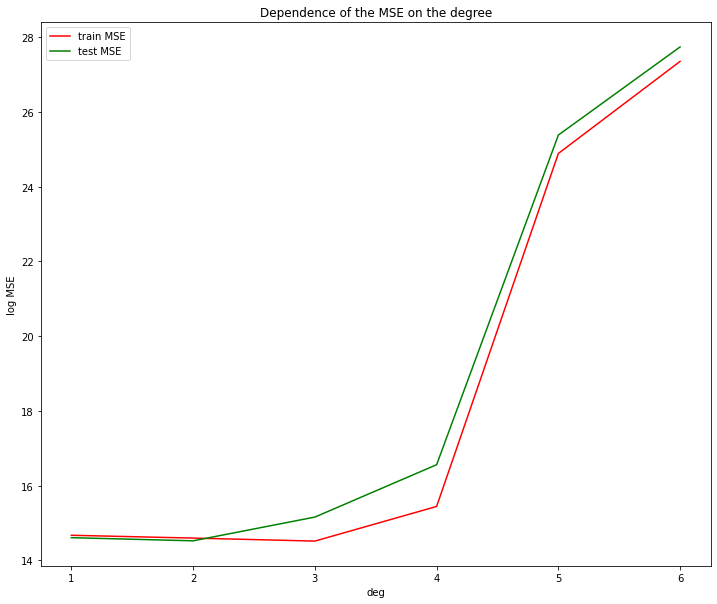

In [ ]:
plt.figure(figsize=(12, 10))

x = np.arange(1, 7)
plt.plot(x, np.log(mse_train), color='r', label='train MSE')
plt.plot(x, np.log(mse_test), color='g', label='test MSE')

plt.title('Dependence of the MSE on the degree')
plt.ylabel('log MSE')
plt.xlabel('deg')
plt.legend()

**Комментарий:** Ухудшение результатов при увелечении степени было ожидаемо, так как происходит эффект переобучения.

Наблюдаемый вами эффект называется переобучением: ситуация, когда модель становится слишком зависимой от обучающей выборки. Действительно, в процессе обучения модели мы стараемся минимизировать ошибку именно на обучающей выборке, и совершенно неочевидно, почему обученная модель будет обобщаться на объекты, которых она раньше не видела.

Когда мы начали добавлять в выборку полиномиальные признаки большой степени, модель стала настолько сложной, что обрела способность запомнить обучающую выборку вместо того, чтобы извлекать из неё какие-то закономерности. Как следствие, когда мы подали модели на вход выборку, отличную от обучающей, мы получили колоссальную ошибку.

Ситуация, когда качество модели на обучающей выборке гораздо ниже качества на тестовой выборке, является самым явным симптомом переобучения, но не единственным. Часто в ситуации переобучения можно наблюдать необычайно большие по модулю коэффициенты модели.

Есть много способов борьбы с этим злом. Один из них --- регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**3. [0,1 балла]** Подумайте, почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

**Обоснование:** Если выбирать коэффициент регуляризации по обучающей выборке, то наилучшим lambda всегда будет 0, так как при lambda = 0 искомое произведение - проекция вектора на подпространство, то есть принимает минимальное значение. Если подбирать по тестовой выборке, то 

**4. [0,3 балла]** Рассмотрим линейную модель с полиномиальными признаками степени $4$ от признаков (carat, x, y, z). Качество такой модели на обучающей выборке уже заметно лучше, чем качество на тестовой. Попробуем исправить эту ситуацию, применив $L2$-регуляризацию. Поделите вашу обучающую выборку на две части в соотношении $8:2$. Большую часть вы вновь объявите обучающей выборкой, а меньшую --- валидационной. Подберите гиперпараметр $\lambda$ по логарифмической сетке таким образом, чтобы линейная модель с "подправленной" матрицей Грама $X^TX$ выдавала лучшее качество на валидационной выборке. Обучите линейную модель с подобранным параметром $\lambda$ на обучающей выборке и протестируйте её на тестовых данных. Сделайте вывод: помогла ли нам регуляризация?

*Примечание: np.logspace вам в помощь.*

In [ ]:
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=25)

In [ ]:
# Нахождение lambda

X = np.concatenate((np.ones((X_tr.shape[0], 1)), 
                    add_polynomial_features(X_tr[:, [0, 6, 7, 8]].astype(np.float64).T, 4).T), 
                    axis=1)
Y = np.array([y_tr.astype(float)]).T

X_val = np.concatenate((np.ones((X_valid.shape[0], 1)), 
                    add_polynomial_features(X_valid[:, [0, 6, 7, 8]].astype(np.float64).T, 4).T), 
                    axis=1)

best_lambda = 0
min_err = 10**100
for l in np.logspace(0, 10):
    a = np.linalg.inv(X.T.dot(X) + l * np.eye(X.shape[1])).dot(X.T).dot(Y).T[0]
    values_valid = np.apply_along_axis(lambda x: np.sum(a * x), 1, X_val)
    err_valid = sum((values_valid - y_valid.astype(float)) ** 2) / len(y_valid)
    if err_valid < min_err:
        min_err = err_valid
        best_lambda = l
        
print(best_lambda)

281.1768697974231


In [ ]:
# Обучение

a = np.linalg.inv(X.T.dot(X) + best_lambda * np.eye(X.shape[1])).dot(X.T).dot(Y).T[0]

In [ ]:
# Тестирование

X_test_ = np.concatenate((np.ones((X_test.shape[0], 1)), 
                    add_polynomial_features(X_test[:, [0, 6, 7, 8]].astype(np.float64).T, 4).T), 
                    axis=1)

values_test = np.apply_along_axis(lambda x: np.sum(a * x), 1, X_test_)
err_test = sum((values_test - y_test.astype(float)) ** 2) / len(y_test)
print(err_test)

1978462.9005122108


**Вывод:** Регуляризация помогла.

**5. [0,5 балла]** Повторите первое задание, но вместо 6 обычных линейных моделей обучите 6 регуляризованных линейных моделей. Для каждой модели вам нужно будет подобрать свой гиперпараметр $\lambda$. Сравните полученный график с графиком из первого задания: для всякой ли степени мы смогли улучшить ситуацию? Как выдумаете, почему?

In [ ]:
# Нахождение lambda

X = [np.concatenate((np.ones((X_tr.shape[0], 1)), 
                     add_polynomial_features(X_tr[:, [0, 6, 7, 8]].astype(np.float64).T, deg).T), 
                     axis=1) for deg in range(1, 7)]
Y = np.array([y_tr.astype(float)]).T

X_val = [np.concatenate((np.ones((X_valid.shape[0], 1)), 
                    add_polynomial_features(X_valid[:, [0, 6, 7, 8]].astype(np.float64).T, deg).T), 
                    axis=1) for deg in range(1, 7)]

best_l = [0] * 6
for i in range(6):
    min_err = 10**100
    for l in np.logspace(0, 15):
        a = np.linalg.inv(X[i].T.dot(X[i]) + l * np.eye(X[i].shape[1])).dot(X[i].T).dot(Y).T[0]
        values_valid = np.apply_along_axis(lambda x: np.sum(a * x), 1, X_val[i])
        err_valid = sum((values_valid - y_valid.astype(float)) ** 2) / len(y_valid)
        if err_valid < min_err:
            min_err = err_valid
            best_l[i] = l
        
print(best_l)

[1.0, 2.023589647725157, 33.9322177189533, 281.1768697974231, 159985.87196060573, 22229964.825261954]


In [ ]:
# Обучение

a = [np.linalg.inv(X[i].T.dot(X[i]) + best_l[i] * np.eye(X[i].shape[1])).dot(X[i].T).dot(Y).T[0] for i in range(6)]

In [ ]:
# Тестирование

values_train = [np.apply_along_axis(lambda x: np.sum(a[i] * x), 1, X[i]) for i in range(6)]
mse_train_reg = [sum((values_train[i] - y_tr.astype(float)) ** 2) / len(y_tr) for i in range(6)]

X_test_ = [np.concatenate((np.ones((X_test.shape[0], 1)),
            add_polynomial_features(X_test[:, [0, 6, 7, 8]].astype(np.float64).T, deg).T),
            axis=1) for deg in range(1, 7)]
values_test = [np.apply_along_axis(lambda x: np.sum(a[i] * x), 1, X_test_[i]) for i in range(6)]
mse_test_reg = [sum((values_test[i] - y_test.astype(float)) ** 2) / len(y_test) for i in range(6)]

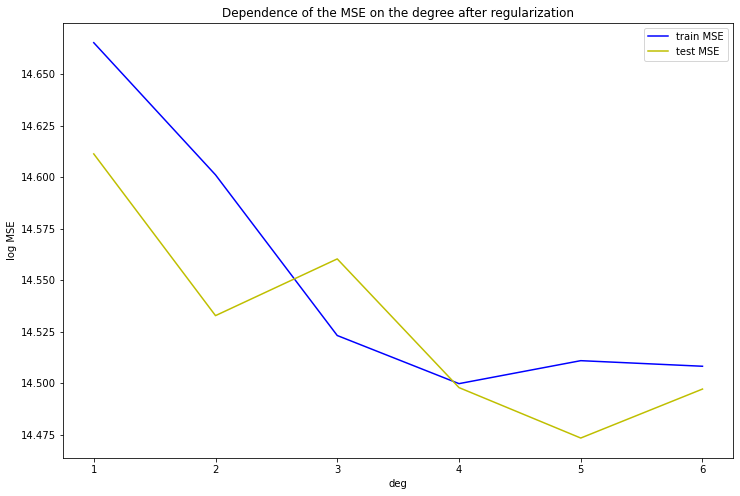

In [ ]:
plt.figure(figsize=(12, 8))

x = np.arange(1, 7)

plt.plot(x, np.log(mse_train_reg), color='b', label='train MSE')
plt.plot(x, np.log(mse_test_reg), color='y', label='test MSE')

plt.title('Dependence of the MSE on the degree after regularization')
plt.ylabel('log MSE')
plt.xlabel('deg')
plt.legend()

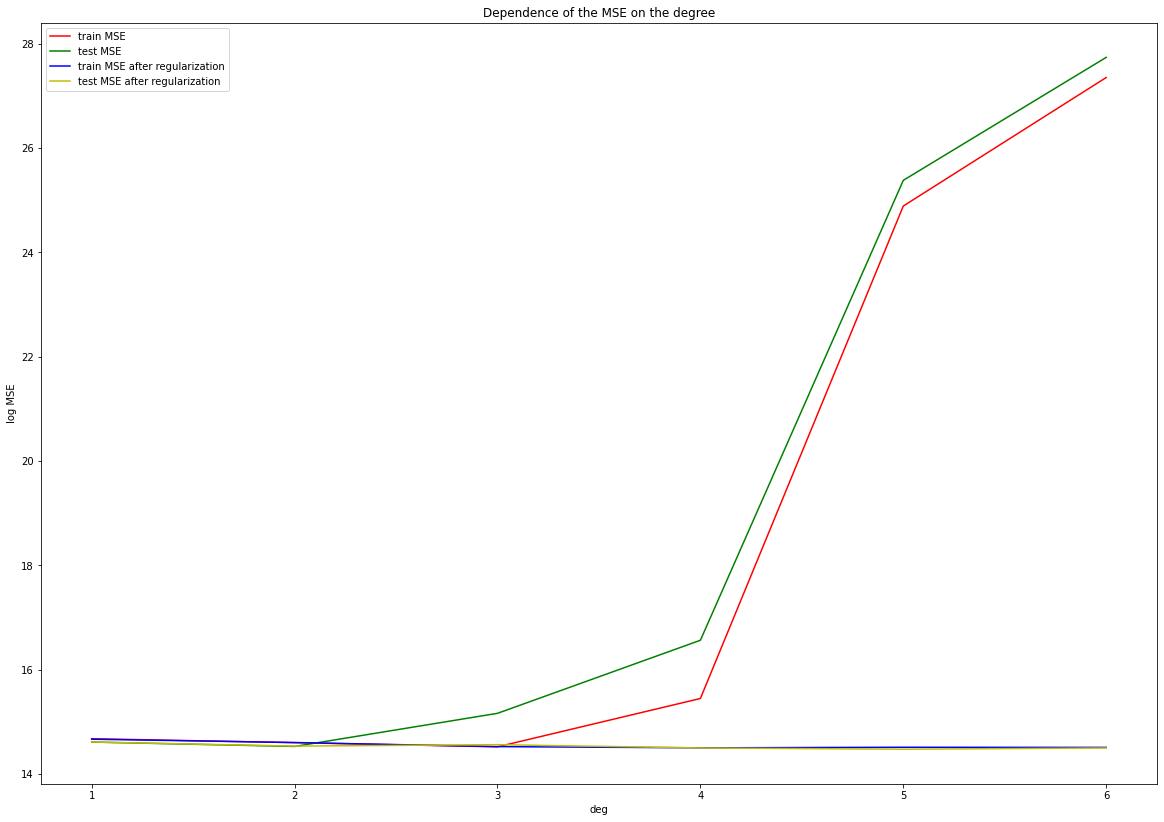

In [ ]:
plt.figure(figsize=(20, 14))

x = np.arange(1, 7)
plt.plot(x, np.log(mse_train), color='r', label='train MSE')
plt.plot(x, np.log(mse_test), color='g', label='test MSE')

plt.plot(x, np.log(mse_train_reg), color='b', label='train MSE after regularization')
plt.plot(x, np.log(mse_test_reg), color='y', label='test MSE after regularization')

plt.title('Dependence of the MSE on the degree')
plt.ylabel('log MSE')
plt.xlabel('deg')
plt.legend()

**Вывод:** после регуляризации ошибка значительно уменьшилась, кроме 1 степени. Это связано с тем, что для 1 степени модель и так очень простая, поэтому она не сильно переобучается и lambda E практически не влияет.

**6. [1,15 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k \leqslant n$. Решите следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$

Заметим, что первое слагаемое --- это значение mean-square error (с точностью до домножения на некоторую константу) модели с коэффициентами $a = (a_1, \ldots, a_k)$. Типичной задачей линейной регрессии является минимизация первого слагаемого по всем векторам $a$. Однако в данном случае кроме минимизации среднеквадратичной ошибки мы также добавляем условие, что при этом и веса модели должны быть как можно меньше. Действительно, мы уже убедились, что чем сложнее модель, тем меньше будет ошибка на обучающей выборке (а именно это ошибку мы и минимизируем в процессе обучения) и тем вероятнее модель будет иметь большие по модулю коэффициенты, а значит, и большое значение $|a|$. Добавляя второе слагаемое в рассматриваемый выше функционал, мы как бы задаём ограничение на абсолютную величину коэффициентов модели. При этом параметр $\lambda$ явно будет указывать, насколько сильно мы будем штрафовать модель за большие коэффициенты. Заметим, что если $\lambda = 0$, то мы получаем классическую задачу линейной регресии без регуляризации.

Ваше решение здесь: $|Xa - y|^2 + \lambda|a|^2 = \sum_{i=1}^n\left({a}_1x_{i1} + {a}_2x_{i2} + \ldots + {a}_kx_{ik} - y_i\right)^2 + \lambda \sum_{i=1}^n({a}_1^2)$. 

Пусть уже найдены все ${a}_i, i \geqslant 2$. Выразим ${a}_1$ и найдем по нему производную для минимизации выражения:

$\sum_{i=1}^n\left(2{a}_1x_{i1}^2 + 2{a}_2x_{i1}x_{i2} + \ldots + 2{a}_kx_{ik}x_{i1} - 2y_ix_{i1}\right) + 2\lambda {a}_1 = 2\sum_{i=2}^n\left({a}_iX_1^{T}X_i\right) + 2{a}_1X_1^{T}X_1 - 2X_1^{T}y + 2\lambda {a}_1 = 0$

Значит, каждое ${a}_k$ удовлетворяет такому же соотношению как ${a}_1$, иначе выражение можно было бы уменьшить: $(X_1^{T}X_1 + \lambda){a}_1 = X_1^{T}y - \sum\limits_{i=1, i \ne k}^n\left({a}_iX_1^{T}X_i\right)$

$$\begin{pmatrix}
(X_1^{T}X_1 + \lambda){a}_1\\
(X_2^{T}X_2 + \lambda){a}_2\\
\vdots \\
(X_n^{T}X_n + \lambda){a}_n
\end{pmatrix} = 
\begin{pmatrix}
X_1^{T}y\\ 
X_2^{T}y\\ 
\vdots\\ 
X_n^{T}y
\end{pmatrix} -
\begin{pmatrix}
\sum\limits_{i=1, i \ne 1}^n\left({a}_iX_1^{T}X_i\right)\\ 
\sum\limits_{i=1, i \ne 2}^n\left({a}_iX_2^{T}X_i\right)\\ 
\vdots \\ 
\sum\limits_{i=1, i \ne n}^n\left({a}_iX_n^{T}X_i\right)
\end{pmatrix}$$

$$\begin{pmatrix}
X_1^{T}X_1 a_1 & 0 & \dots & 0\\
0 & X_2^{T}X_2 a_2 & \dots & 0\\
\vdots & \vdots & \vdots & \vdots\\
0 & 0 & \dots & X_n^{T}X_n a_n
\end{pmatrix} + \lambda a = 
\begin{pmatrix}
X_1^{T}y\\ 
X_2^{T}y\\ 
\vdots\\ 
X_n^{T}y
\end{pmatrix} -
\begin{pmatrix}
\sum\limits_{i=1, i \ne 1}^n\left({a}_iX_1^{T}X_i\right)\\ 
\sum\limits_{i=1, i \ne 2}^n\left({a}_iX_2^{T}X_i\right)\\ 
\vdots \\ 
\sum\limits_{i=1, i \ne n}^n\left({a}_iX_n^{T}X_i\right)
\end{pmatrix}$$


$$\begin{pmatrix}
X_1^{T}X_1 a_1 & 0 & \dots & 0\\
0 & X_2^{T}X_2 a_2 & \dots & 0\\
\vdots & \vdots & \vdots & \vdots\\
0 & 0 & \dots & X_n^{T}X_n a_n
\end{pmatrix} a + \lambda a + 
\begin{pmatrix}
X_1^{T}\sum\limits_{i=1, i \ne 1}^n\left({a}_iX_i\right)\\ 
X_2^{T}\sum\limits_{i=1, i \ne 2}^n\left({a}_iX_i\right)\\ 
\vdots \\ 
X_n^{T}\sum\limits_{i=1, i \ne n}^n\left({a}_iX_i\right)
\end{pmatrix}
= 
\begin{pmatrix}
X_1^{T}\\ 
X_2^{T}\\ 
\vdots\\ 
X_n^{T}
\end{pmatrix}y
$$

$$
\begin{pmatrix}
X_1^{T}\sum\limits_{i=1}^n\left({a}_iX_i\right)\\ 
X_2^{T}\sum\limits_{i=1}^n\left({a}_iX_i\right)\\ 
\vdots \\ 
X_n^{T}\sum\limits_{i=1}^n\left({a}_iX_i\right)
\end{pmatrix} +
\lambda a
= 
\begin{pmatrix}
X_1^{T}\\ 
X_2^{T}\\ 
\vdots\\ 
X_n^{T}
\end{pmatrix}y
$$


$$ X^T X  a + \lambda a = X^T y$$
$$ (X^T X + \lambda E) a = X^T y$$
$$ a = (X^T X + \lambda E)^{-1} X^T y $$